# MESA Stats

These are statistics associated with development of the MESA stellar evolution code.

## Preamble

In [1]:
from collections import Counter, deque
import datetime

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('styles/mesa.mplstyle')

## SVN Era

From 2007-2020, MESA was developed in a Subversion repository, first
hosted on SourceForge and then later by Assembla.  The file `svn-log.xml`
is the SVN log dump of this repository in its final state (at r15197).

It was generated with the command `svn log -v --xml > svn-log.xml`.

In [3]:
import dateutil
import xml.etree.ElementTree as ET

In [4]:
tree = ET.parse('svn-log.xml')
root = tree.getroot()

### Version history

Some SVN revisions of MESA were designated as "release" versions.

In [5]:
versions = [15140, 12778, 12115, 11701, 11554, 11532, 10398, 10108, 
10000, 9793, 9575, 8845, 8118, 7624, 7503, 7499, 7385, 7184, 6794,
6596, 6208, 6188, 6022, 5819, 5596, 5527, 5456, 5329, 5271, 5232,
5118, 4942, 4906, 4849, 4798, 4740, 4723, 4631, 4442, 4411, 4298,
4219, 4088, 4028, 3918, 3851, 3794, 3723, 3709, 3635, 3372, 3290,
3251, 3107, 3075, 2987, 2941, 2891, 2871, 2808, 2790, 2745, 2699,
2664, 2637, 2618, 2602, 2578, 2557, 2533, 2404, 2341, 2258, 2208,
2078, 1943, 1728, 1691, 1585, 1489, 1396, 1296, 1249, 1145, 1118,
971, 776]

Parse the XML file and use it to get the revision -> date mapping

In [6]:
commits = []
for log in root.iter('logentry'):
    rev = int(log.get('revision'))
    date = mpl.dates.date2num(dateutil.parser.parse(log.find('date').text))
    commits.append((rev, date))
commits.reverse()
rev_to_date = dict(commits)

In [7]:
version_dates = [rev_to_date[v] for v in versions]

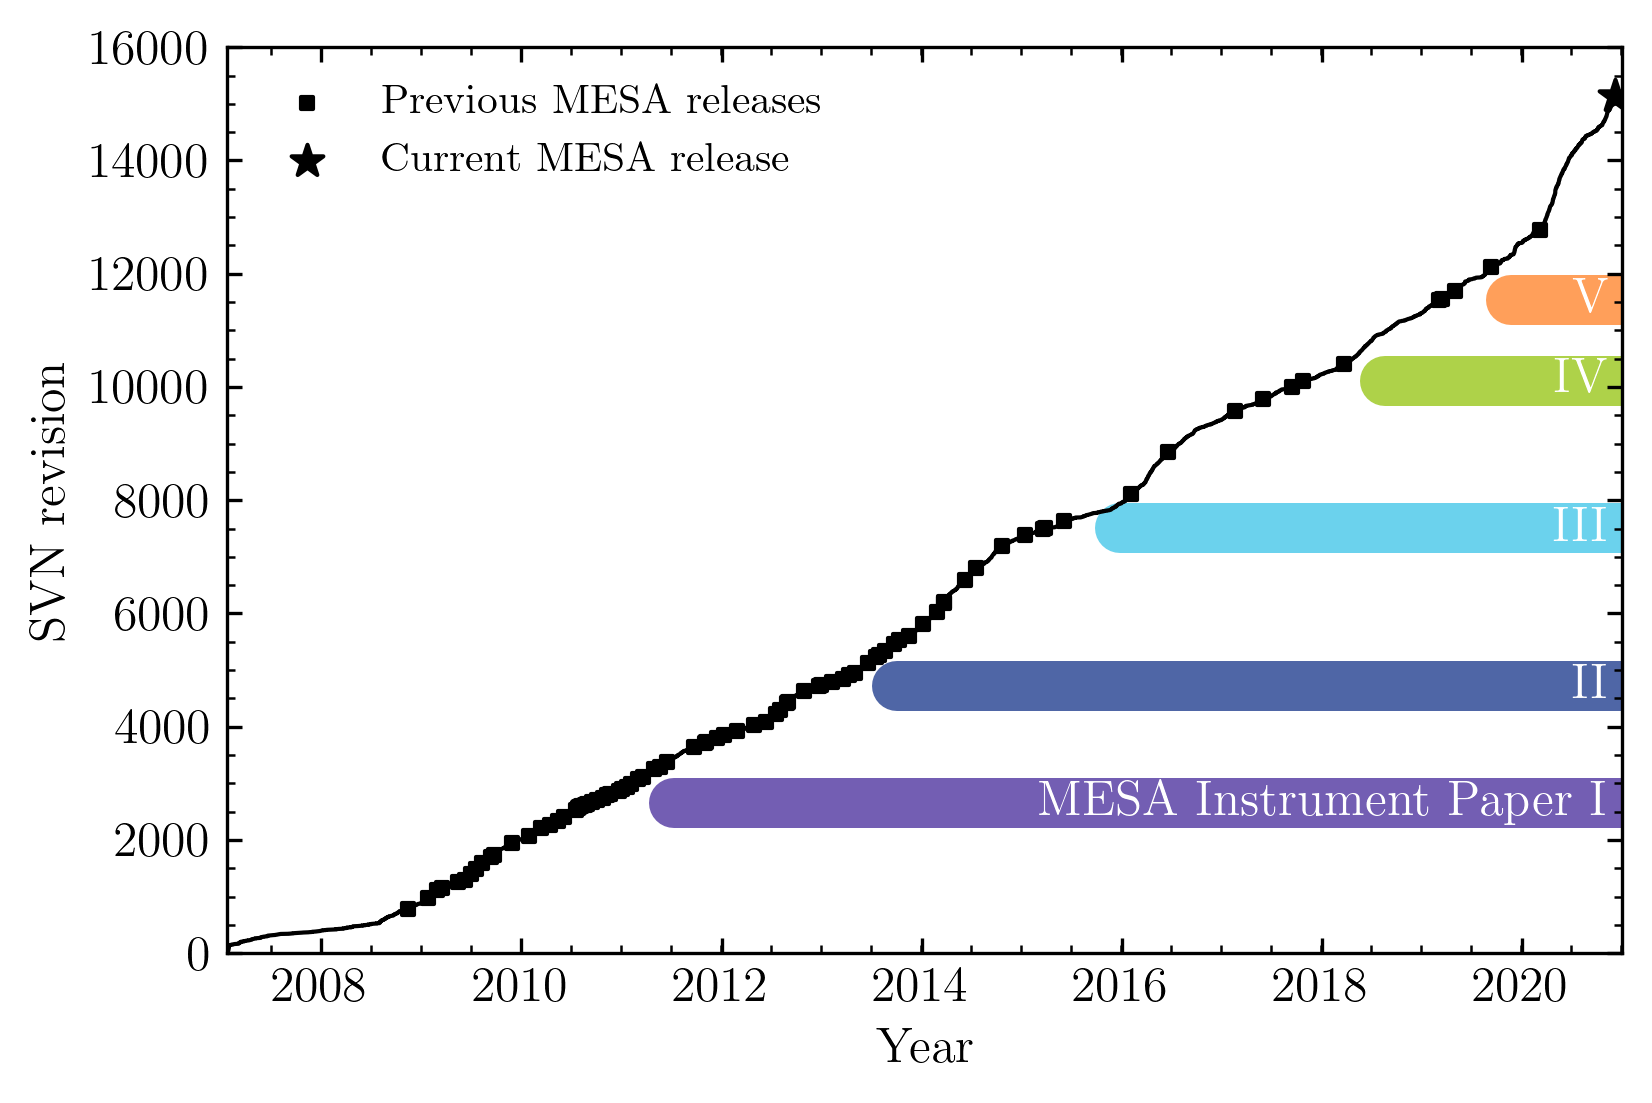

In [8]:
fig, ax = plt.subplots()
ax.plot_date(rev_to_date.values(), rev_to_date.keys(), '-', color='black', lw=1)
ax.set_xlabel('Year')
ax.set_ylabel('SVN revision')
ax.scatter(version_dates[1:], versions[1:], color='black', marker='s', s=9, label='Previous MESA releases')
ax.scatter(version_dates[0], versions[0], color='black', marker='*', s=64, label='Current MESA release')
ax.set_ylim(0, 16000)

def do_one(x, y, s, c='white'):
    "Draw annotated bar extending from the right"
    ax.axhline(y, x, 1.0, lw=12, zorder=-99, solid_capstyle='round', color=c)
    ax.text(0.99, y/16000, s, horizontalalignment='right', 
            verticalalignment='center', transform=ax.transAxes, color='white', zorder=-90)

# draw a bar for each MESA instrument paper
do_one(0.32, 2650, 'MESA Instrument Paper I', '#735EB3')
do_one(0.48, 4723, 'II', '#4F66A6')
do_one(0.64, 7503, 'III', '#6BD2ED')
do_one(0.83, 10108, 'IV', '#AED249')
do_one(0.92, 11532, 'V', '#FF9F5A')

ax.legend()
ax.set_xlim([datetime.date(2007, 1, 24), datetime.date(2021, 1, 1)])
fig.set_size_inches(6,4)
fig.savefig('MESA-versions.png', bbox_inches='tight')

## Author history

MESA was primarily written by Bill Paxton, with help from a team of other contributors.

In [9]:
# username -> person mapping
# one individual may have multiple entries

username_to_name = {
    'bill_paxton': 'Bill Paxton',
    'billpaxton': 'Bill Paxton',
    'bpaxton': 'Bill Paxton',
    'jschwab': 'Josiah Schwab',
    'rhdt': 'Rich Townsend',
    'rhdtownsend': 'Rich Townsend',
    'rfarmer1': 'Rob Farmer',
    'rjfarmer': 'Rob Farmer',
    'orlox': 'Pablo Marchant',
    'fxt': 'Frank Timmes',
    'fxt4444': 'Frank Timmes',
    'aaron_dotter': 'Aaron Dotter',
    'AaronDotter': 'Aaron Dotter',
    'nworbde': 'Ed Brown',
    'lanelson': 'Lorne Nelson',
    'evbauer': 'Evan Bauer',
    'ebauer': 'Evan Bauer',
    'kgbudge': 'Kent Budge',
    'jrtomshine': 'Jonathan Tomshine',
    'twist356': 'Joris Vos',
    'warrickball': 'Warrick Ball',
    'annethoul': 'Anne Thoul',
    'anne.thoul': 'Anne Thoul',
    'radeksm': 'Radek Smolec',
    'adamjermyn' : 'Adam Jermyn',
    'zmzhang': 'Michael Zhang',
    'Meridith.Joyce': 'Meridith Joyce',
    'meridith.joyce': 'Meridith Joyce'
}

Count number of commits from each author.

The number of commits is not a complete measure of an individual's contributions to MESA!

In [10]:
committers = []
for log in root.iter('logentry'):
    rev = int(log.get('revision'))
    author = log.find('author').text
    committers.append(username_to_name[author])
    
commit_counts = Counter(committers)

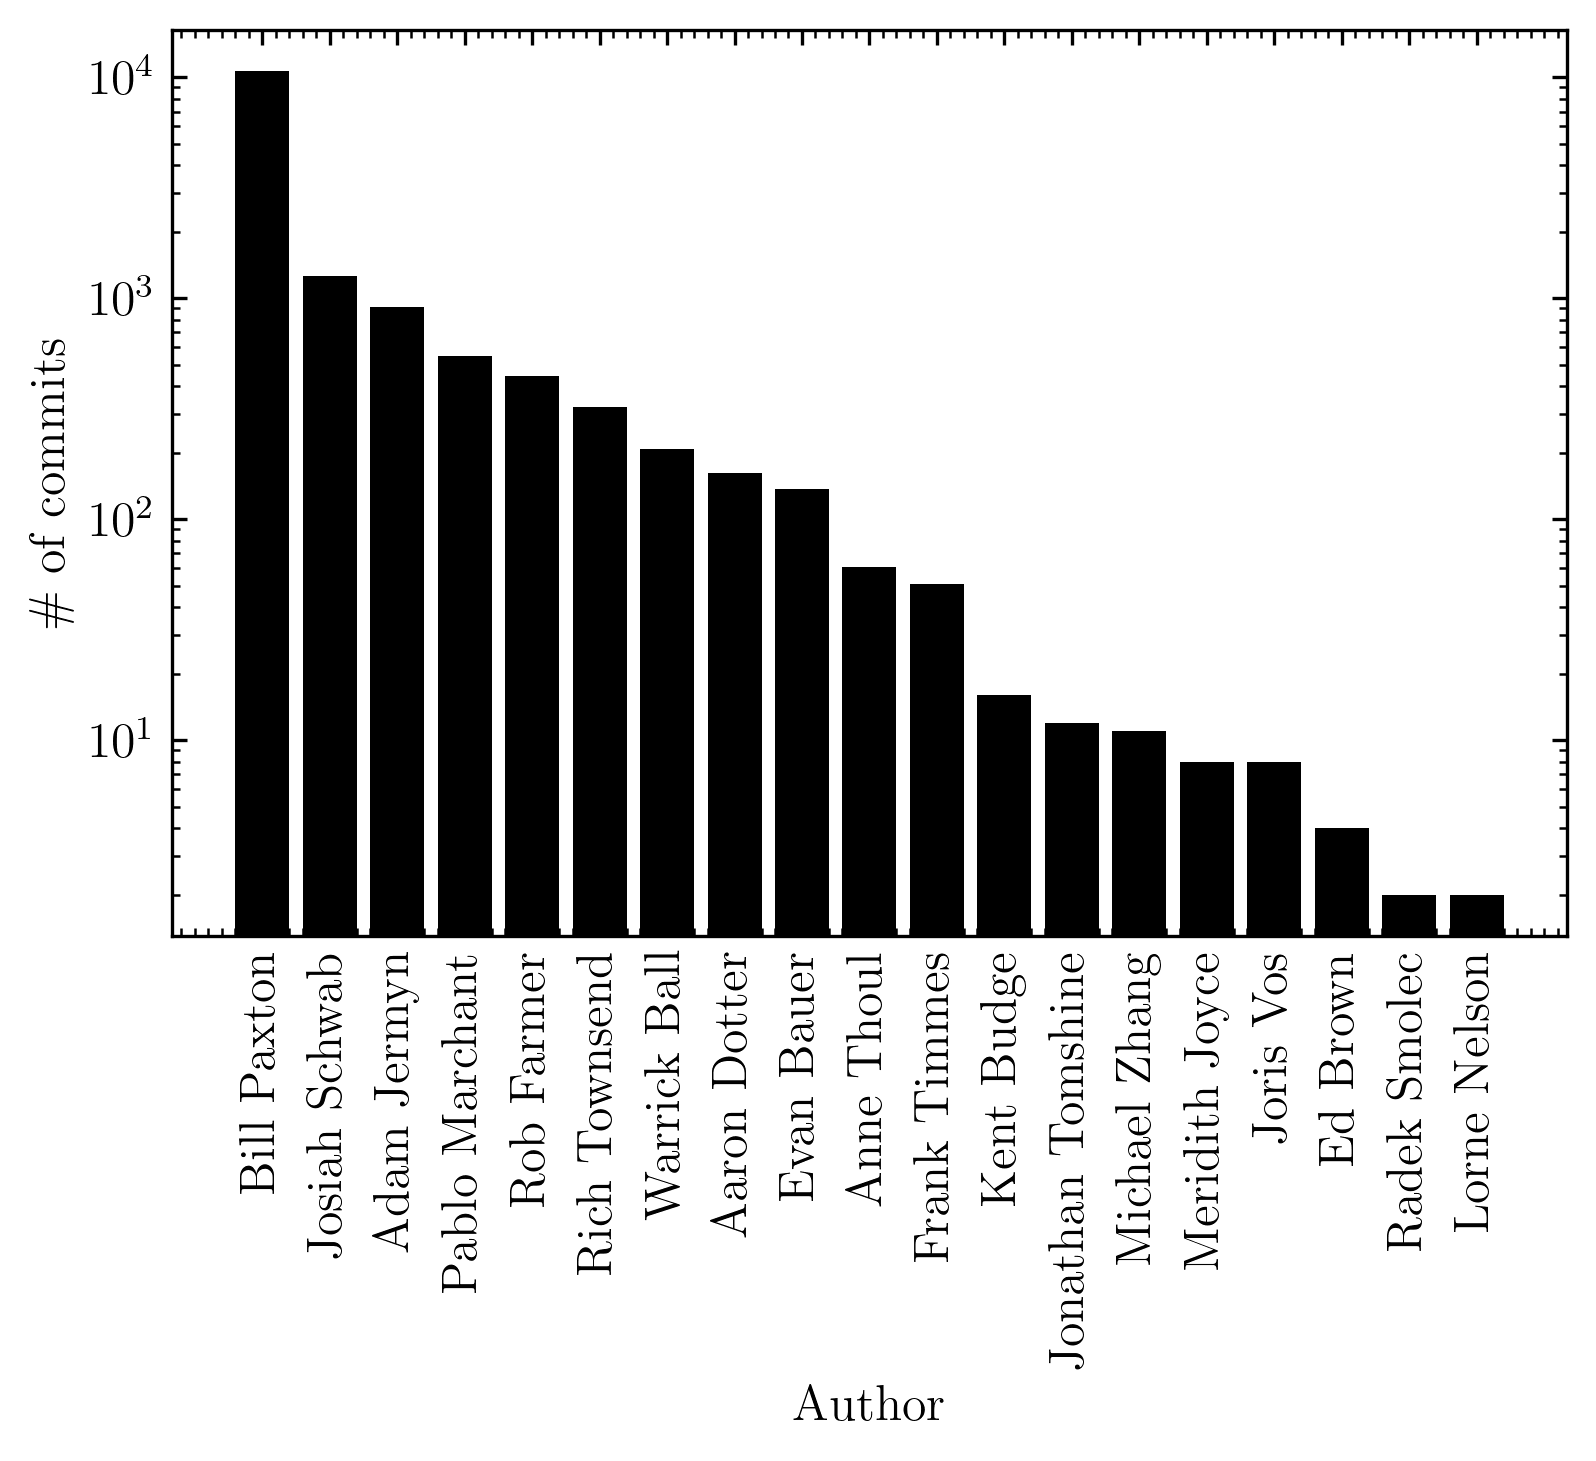

In [11]:
fig, ax = plt.subplots()

# extract ordered list of committers
authors, counts = zip(*commit_counts.most_common())

index = np.array(range(len(authors)))
ax.bar(index, counts, color='black')

ax.set_xlabel(r'Author')
ax.set_ylabel(r'\# of commits')
bar_width = 1
ax.set_xticks(index + bar_width - 1)
ax.set_xticklabels(authors, rotation='vertical')
ax.set_yscale('log')
fig.set_size_inches(6,4)
fig.savefig('MESA-authors.png', bbox_inches='tight')

### Bill Paxton's Contributions

The magnitude of Bill Paxton's contribution becomes clear on a linear scale.

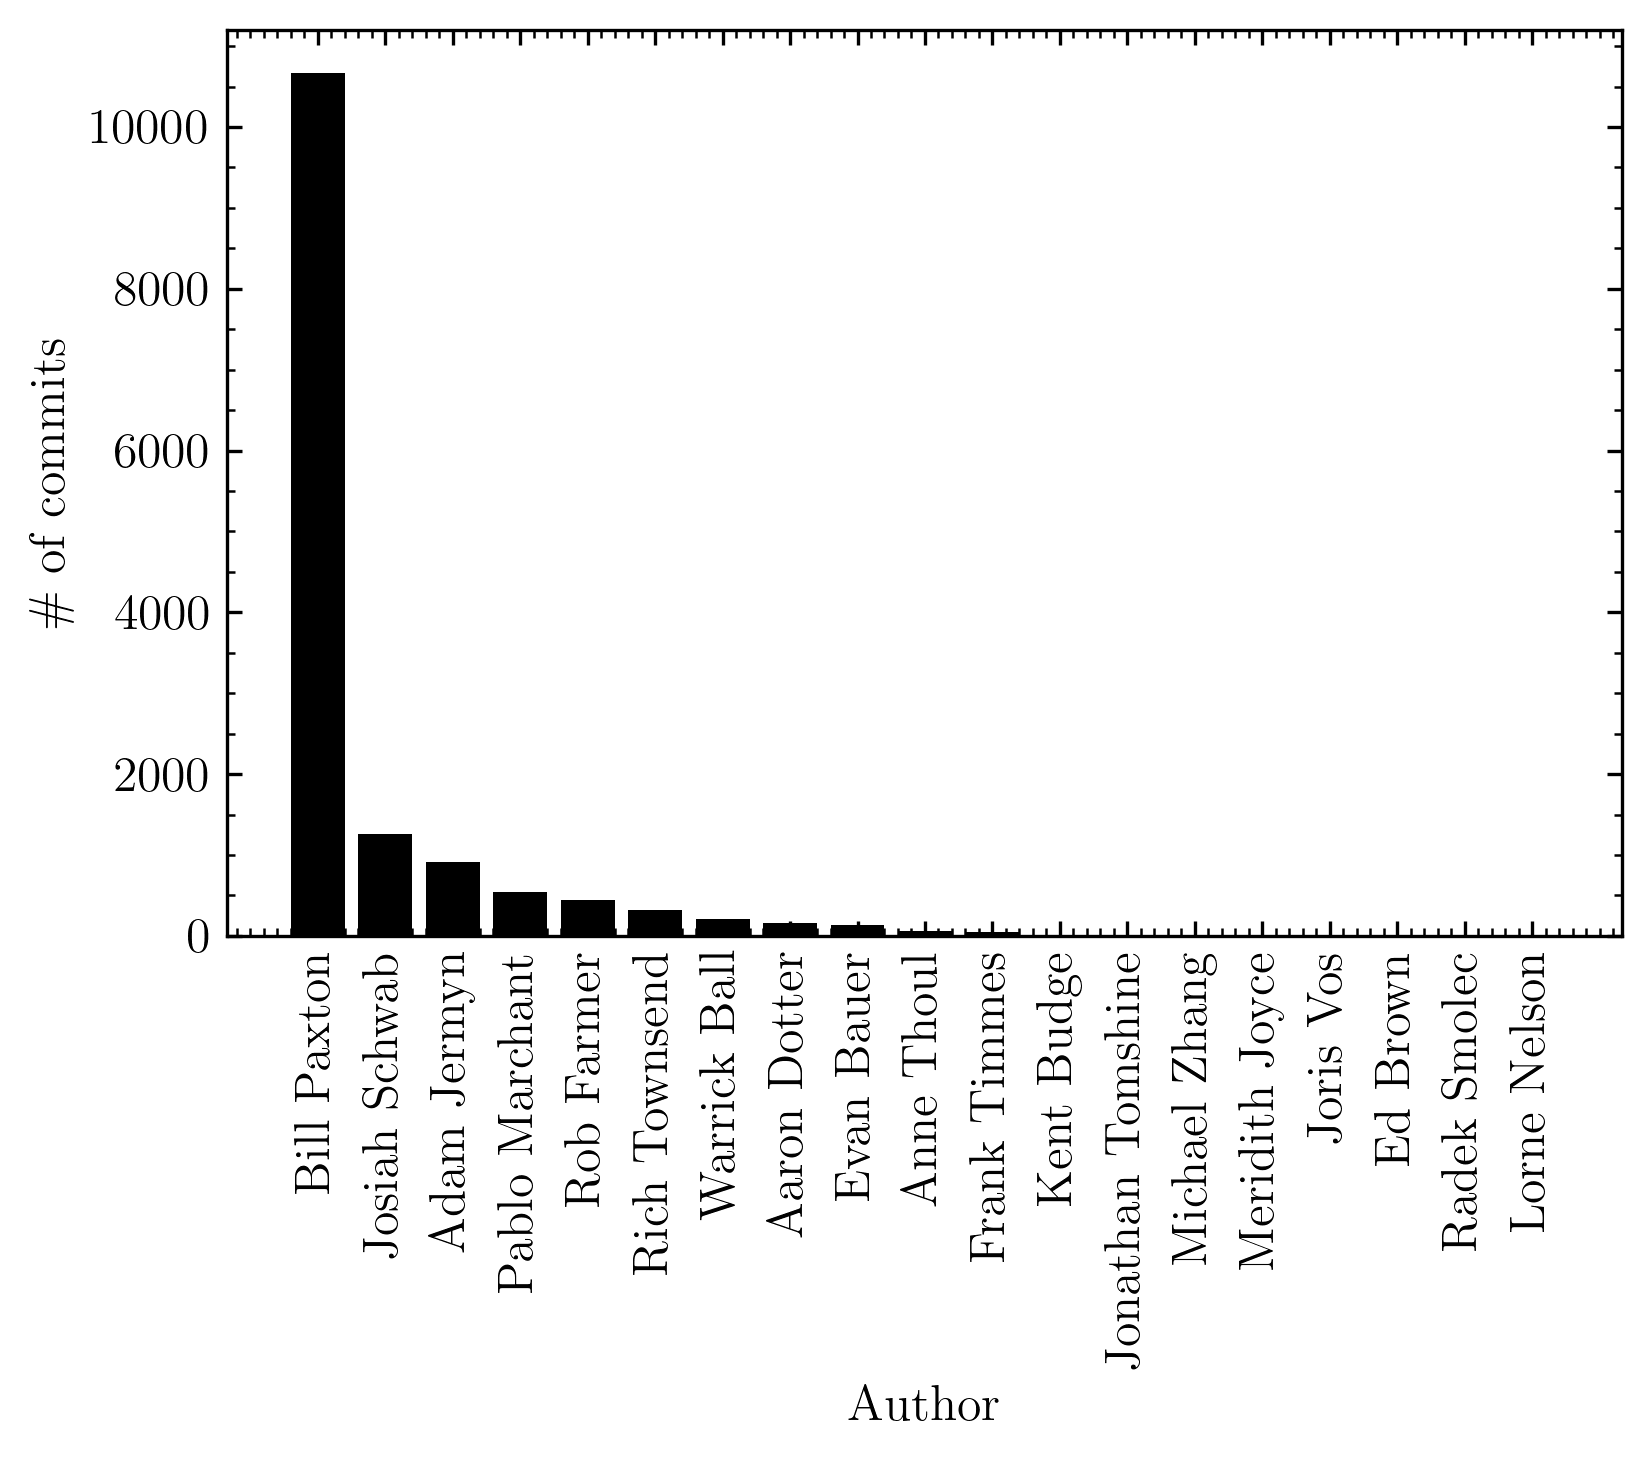

In [12]:
fig, ax = plt.subplots()

# extract ordered list of committers
authors, counts = zip(*commit_counts.most_common())

index = np.array(range(len(authors)))
ax.bar(index, counts, color='black')

ax.set_xlabel(r'Author')
ax.set_ylabel(r'\# of commits')
bar_width = 1
ax.set_xticks(index + bar_width - 1)
ax.set_xticklabels(authors, rotation='vertical')
fig.set_size_inches(6,4)
fig.savefig('MESA-authors-linear.png', bbox_inches='tight')

One of the key indicators of MESA's health has been the increase in the number of active committers and the corresponding decrease in the fraction of commits by Bill Paxton.

In [13]:
# track number of committers and fraction of commts from in a 1000 commit sliding window
window_width = 1000

# from https://stackoverflow.com/questions/6822725/rolling-or-sliding-window-iterator-in-python
def window(seq, n=2):
    it = iter(seq)
    win = deque((next(it, None) for _ in range(n)), maxlen=n)
    yield win
    append = win.append
    for e in it:
        append(e)
        yield win
        
nauthors = []
fbill = []
for w in window(committers, window_width):
    c = Counter(w)
    n = len(c.keys())
    f = c['Bill Paxton'] / float(window_width)
    nauthors.append(n)
    fbill.append(f)

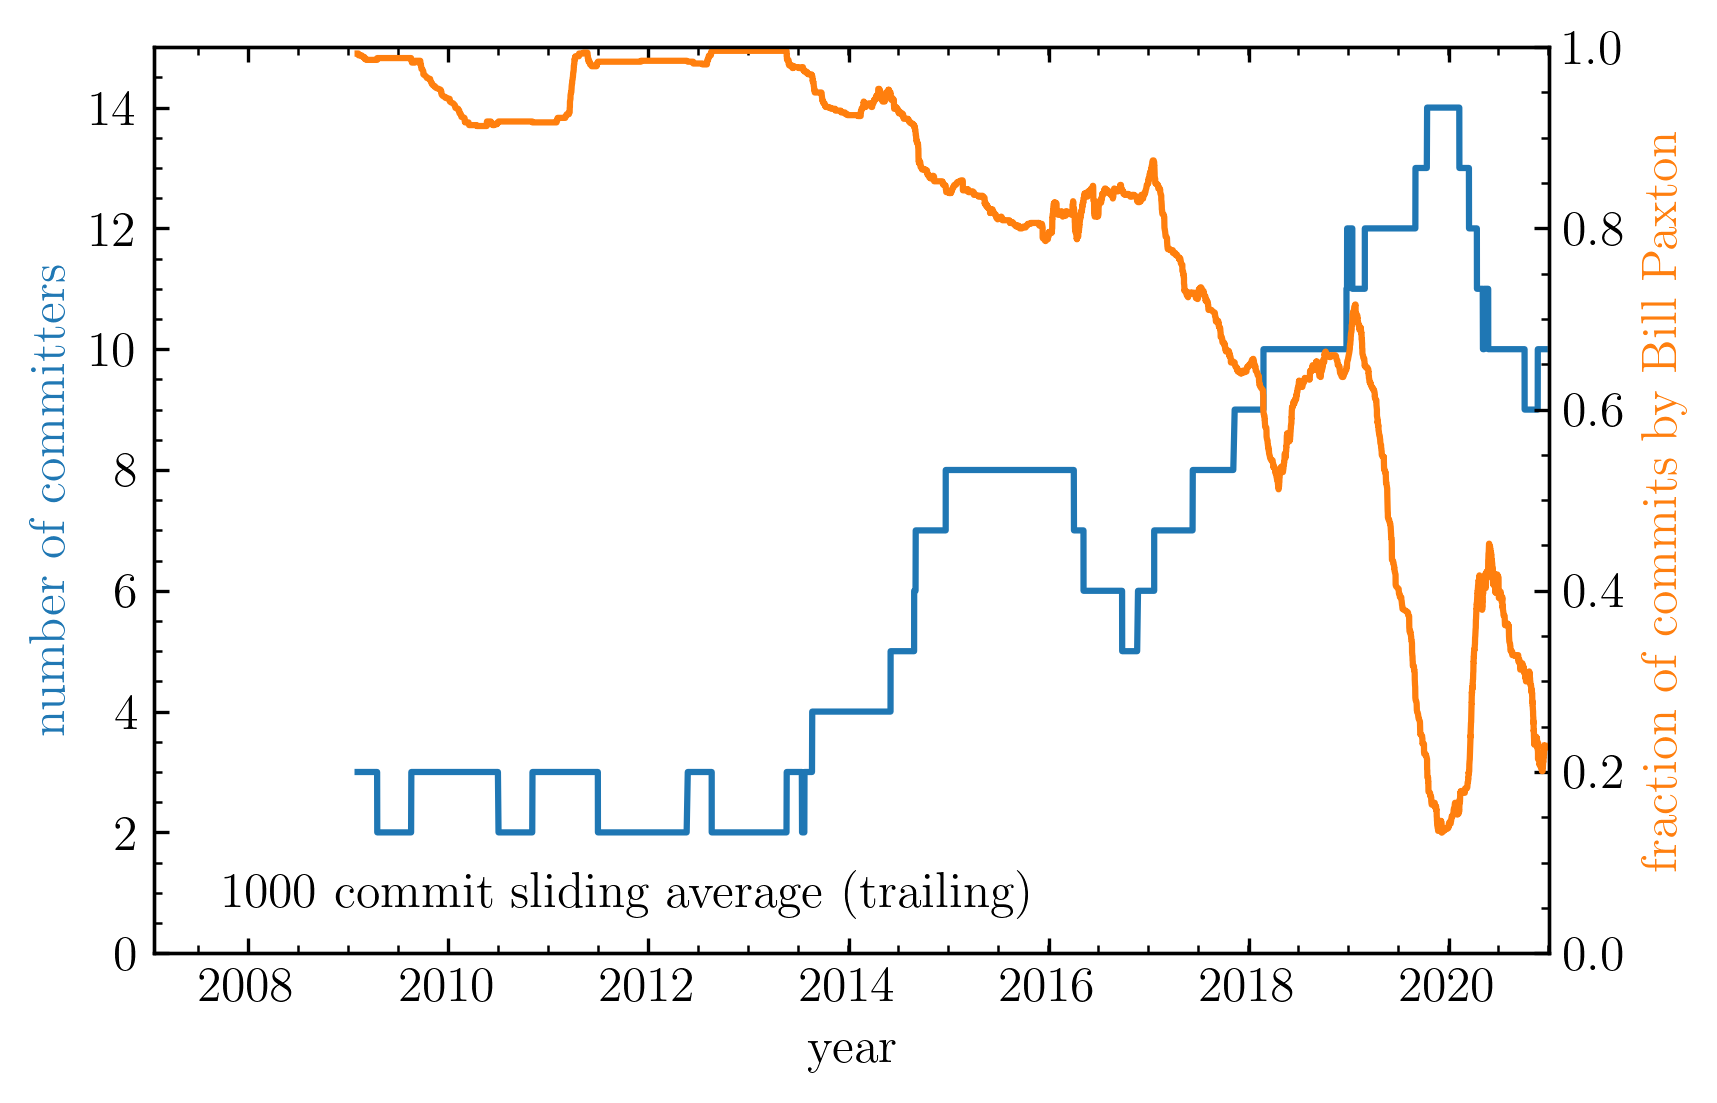

In [16]:
fig, ax1 = plt.subplots()
date_list = list(rev_to_date.values()) # ok b/c Python dicts are ordered now
ax1.plot_date(date_list[window_width-1:], nauthors[::-1], '-', color='C0')
ax2 = ax1.twinx()
ax2.plot_date(date_list[window_width-1:], fbill[::-1], '-', color='C1')

ax1.set_xlabel('year')
ax1.set_ylabel('number of committers', color='C0')
ax2.set_ylabel('fraction of commits by Bill Paxton', color='C1')
ax1.set_ylim(0,15)
ax2.set_ylim(0.0, 1.0)
for ax in (ax1, ax2):
    ax.set_xlim([datetime.date(2007, 1, 24), datetime.date(2021, 1, 1)])
ax1.text(0.05, 0.05, '1000 commit sliding average (trailing)', transform=ax1.transAxes,)
fig.set_size_inches(6,4)
fig.savefig('MESA-contributors.png', bbox_inches='tight')

### Trivia

In [17]:
n = 0
for log in root.iter('logentry'):
    rev = int(log.get('revision'))
    msg = log.find('msg').text
    if msg == 'test':
        n += 1            
print(f'{n} revisions have a commit message consisting of just the word "test"')

1237 revisions have a commit message consisting of just the word "test"


## Git Era

As of mid-December 2020, MESA moved to GitHub.  Its repository was initialized at r15140.

GitHub automatically provides some stats: https://github.com/MESAHub/mesa/graphs/contributors